# Step 1: Preprocessing 

In [1]:
#Import Libraries and Dependencies 
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler 

In [7]:
# Import CSV and Convert to DataFrame 
df1 = pd.read_csv(Path('/Users/pallaviojha/CrimeStoppers/Resources/crime_rate.csv'))
df1=pd.DataFrame(df1)
df1.tail()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
206430,-8.855354e+06,5.426936e+06,206214,GO-20191554251,2019/08/13 04:00:00+00,2019/08/16 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,17,Auto Theft,D31,21,Humber Summit (21),43.750652,-79.549,206431
206431,-8.847784e+06,5.416596e+06,206215,GO-20191535011,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Commercial,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,14,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.683521,-79.481,206432
206432,-8.857803e+06,5.428142e+06,206216,GO-20191534561,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,13,Auto Theft,D31,21,Humber Summit (21),43.758480,-79.571,206433
206433,-8.850567e+06,5.415343e+06,206217,GO-20191536931,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,11,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.675377,-79.506,206434
206434,-8.849009e+06,5.421924e+06,206218,GO-20191539696,2019/08/13 04:00:00+00,2019/08/14 04:00:00+00,House,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,22,Auto Theft,D12,29,Maple Leaf (29),43.718124,-79.492,206435


In [8]:
#Drop Unnesccesary Columns in Crime Df 
df1.drop('X', axis=1, inplace=True)
df1.drop('Y', axis=1, inplace=True)
df1.drop('reporteddate', axis=1, inplace=True)
df1.drop('premisetype', axis=1, inplace=True)
df1.drop('ucr_code', axis=1, inplace=True)
df1.drop('ucr_ext', axis=1, inplace=True)
df1.drop('Index_', axis=1, inplace=True)
df1.drop('event_unique_id', axis=1, inplace=True)
df1.drop('occurrencedayofyear', axis=1, inplace=True)
df1.drop('reportedmonth', axis=1, inplace=True)
df1.drop('reportedday', axis=1, inplace=True)
df1.drop('reporteddayofyear', axis=1, inplace=True)
df1.drop('reporteddayofweek', axis=1, inplace=True)
df1.drop('reportedhour', axis=1, inplace=True)
df1.drop('occurrenceyear', axis=1, inplace=True)
df1.drop('Division', axis=1, inplace=True)
df1.drop('Hood_ID', axis=1, inplace=True)
df1.drop('Neighbourhood', axis=1, inplace=True)
df1.drop('Lat', axis=1, inplace=True)
df1.drop('Long', axis=1, inplace=True)
df1.drop('ObjectId', axis=1, inplace=True)
df1.drop('offence', axis=1, inplace=True)
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI
0,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,21,Break and Enter
...,...,...,...,...,...,...,...
206430,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,17,Auto Theft
206431,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,14,Auto Theft
206432,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,13,Auto Theft
206433,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,11,Auto Theft


In [9]:
#Strip Date Column 
df1['occurrencedate'] = df1['occurrencedate'].map(lambda x: str(x)[:+10])
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI
0,2014/01/07,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07,2014,January,7.0,Tuesday,21,Break and Enter
...,...,...,...,...,...,...,...
206430,2019/08/13,2019,August,13.0,Tuesday,17,Auto Theft
206431,2019/08/13,2019,August,13.0,Tuesday,14,Auto Theft
206432,2019/08/13,2019,August,13.0,Tuesday,13,Auto Theft
206433,2019/08/13,2019,August,13.0,Tuesday,11,Auto Theft


In [10]:
#Rename Occurence Column to merge with df2
df1 = df1.rename({'occurrencedate': 'Date'}, axis=1)
df1 = df1.rename({'occurrencehour':'hour_num'}, axis=1)          
df1.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI
0,2014/01/07,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07,2014,January,7.0,Tuesday,21,Break and Enter


In [11]:
# convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '11-14-2018'
#Add them to the df2
mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]
df1
#convert occurenceday column to integer
df1['occurrenceday'] = df1['occurrenceday'].astype(int)
df1.dtypes

Date                   datetime64[ns]
reportedyear                    int64
occurrencemonth                object
occurrenceday                   int64
occurrencedayofweek            object
hour_num                        int64
MCI                            object
dtype: object

In [13]:
#read in temperature data 
df2 = pd.read_csv(Path('//Users/pallaviojha/CrimeStoppers/Resources/Toronto_temp_clean.csv'))
df2=pd.DataFrame(df2)
df2

,Date_,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2884,1941-12-01,1941,12,1,-1.5,41.1,Winter,Yes,Yes
2885,1940-12-01,1940,12,1,-3.6,82.6,Winter,Yes,Yes
2886,1939-12-01,1939,12,1,NaN,NaN,Winter,No,No
2887,1938-12-01,1938,12,1,-2.5,27.4,Winter,Yes,Yes


In [14]:
#Rename Date_ Column to merge with df1
df2 = df2.rename({'Date_': 'Date'}, axis=1)
df2.head()

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No


In [15]:
#Convert Date column to date time 
df2['Date'] = pd.to_datetime(df2['Date']) 
df2.head()
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '01-01-2019'
#Add them to the df2
mask = (df2['Date'] > start_date) & (df2['Date'] <= end_date)
df2 = df2.loc[mask]
#Sort Values from 2014 to 2018
df2.sort_values(by=['Date'], inplace=True, ascending=True)
df2

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
146,2014-01-09,"2,014",1,9,-11.0,0.0,Winter,No,No
145,2014-01-10,"2,014",1,10,-3.0,3.0,Winter,Yes,Yes
144,2014-01-11,"2,014",1,11,4.0,8.0,Winter,Yes,No
143,2014-01-12,"2,014",1,12,1.0,0.0,Winter,No,No
142,2014-01-13,"2,014",1,13,4.0,1.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2422,2018-11-10,"2,018",11,10,0.0,0.0,Fall,No,No
2421,2018-11-11,"2,018",11,11,1.0,0.0,Fall,No,No
2420,2018-11-12,"2,018",11,12,4.0,1.0,Fall,Yes,No
2419,2018-11-13,"2,018",11,13,-1.0,1.0,Fall,Yes,No


In [16]:
#Export cleaned DataFrames & Connect to AWS 
#df1.to_csv('cleaned_crime_rate.csv', index = False)
#df2.to_csv('cleaned_temp_rate.csv', index = False)

In [19]:
#Import dependencies to connect the database 
from sqlalchemy import create_engine
from config import DB_HOST, DB_NAME,DB_USER,DB_PASS
import psycopg2

In [20]:
#store credentials in a variable 
conn = psycopg2.connect(dbname=DB_NAME, user=DB_USER,password=DB_PASS,host=DB_HOST)

In [21]:
#connect to database
cur = conn.cursor()

In [22]:
#connect to desired table "merged_df"
cur.execute("SELECT * FROM merged_df;")

In [23]:
#print table 
print(cur.fetchall())

nday    ', 14, 'Assault', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 2, 'Assault', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 3, 'Break and Enter', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 2, 'Assault', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 2, 'Assault', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 3, 'Assault', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 10, 'Break and Enter', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018, 'October', 14, 'Sunday    ', 20, 'Robbery', Decimal('10'), Decimal('14'), 9.0, 0.0, 'Fall', 'No', 'No'), ('2018-10-14', 2018,

In [24]:
import pandas.io.sql as sqlio

In [25]:
#Read database into a dataframe 
sql = "SELECT * FROM merged_df;"

In [26]:
merged_df = sqlio.read_sql_query(sql, conn)

In [27]:
#convert date column to datetime format
merged_df['date_'] = pd.to_datetime(merged_df['date_'], infer_datetime_format=True)

merged_df.dtypes

date_                  datetime64[ns]
reportedyear                    int64
occurrencemonth                object
occurrenceday                   int64
occurrencedayofweek            object
hour_num                        int64
mci                            object
month_                        float64
day_                          float64
mean_temp                     float64
total_precip                  float64
season                         object
rain                           object
snow                           object
dtype: object

In [28]:
#Clean merged df 
#merged_df.drop('Year_', axis=1, inplace=True)
merged_df.drop('day_', axis=1, inplace=True)
merged_df.drop('month_', axis=1, inplace=True)
merged_df

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,rain,snow
0,2014-01-09,2014,January,9,Thursday,22,Assault,-11.0,0.0,Winter,No,No
1,2014-01-09,2014,January,9,Thursday,17,Assault,-11.0,0.0,Winter,No,No
2,2014-01-09,2014,January,9,Thursday,17,Assault,-11.0,0.0,Winter,No,No
3,2014-01-09,2014,January,9,Thursday,21,Robbery,-11.0,0.0,Winter,No,No
4,2014-01-09,2014,January,9,Thursday,10,Theft Over,-11.0,0.0,Winter,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
162091,2018-11-06,2018,November,6,Tuesday,6,Auto Theft,12.0,7.0,Fall,Yes,No
162092,2018-11-06,2018,November,6,Tuesday,19,Auto Theft,12.0,7.0,Fall,Yes,No
162093,2018-11-06,2018,November,6,Tuesday,22,Auto Theft,12.0,7.0,Fall,Yes,No
162094,2018-11-06,2018,November,6,Tuesday,22,Auto Theft,12.0,7.0,Fall,Yes,No


In [29]:
#Create Second Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["mci"])

LabelEncoder()

In [30]:
#MCI Dictionary
Offences_num = {
    "Assault": 1,
    "Auto Theft": 2,
    "Break and Enter": 3,
    "Robbery": 4,
    "Theft Over":5,
}
#Add MCI Dictionary to DataFrame
merged_df["Offences_type"] = merged_df["mci"].apply(lambda x: Offences_num[x])
merged_df.head()
# Drop MCI & Offences_Type Columns 
#merged_df.drop(["MCI", "Offences_Type"], axis=1, inplace=True)
#merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,rain,snow,Offences_type
0,2014-01-09,2014,January,9,Thursday,22,Assault,-11.0,0.0,Winter,No,No,1
1,2014-01-09,2014,January,9,Thursday,17,Assault,-11.0,0.0,Winter,No,No,1
2,2014-01-09,2014,January,9,Thursday,17,Assault,-11.0,0.0,Winter,No,No,1
3,2014-01-09,2014,January,9,Thursday,21,Robbery,-11.0,0.0,Winter,No,No,4
4,2014-01-09,2014,January,9,Thursday,10,Theft Over,-11.0,0.0,Winter,No,No,5


In [31]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencedayofweek"])
# List the Encoded Classes
list(label_encoder.classes_)

['Friday    ',
 'Monday    ',
 'Saturday  ',
 'Sunday    ',
 'Thursday  ',
 'Tuesday   ',
 'Wednesday ']

In [32]:
#Weekday Dictionary
Week_day_num = {
    "Monday    ": 1,
    "Tuesday   ": 2,
    "Wednesday ": 3,
    "Thursday  ": 4,
    "Friday    ": 5,
    "Saturday  ": 6,
    "Sunday    ": 7,
}
#Add Months Dictionary to DataFrame
merged_df["occurrencedayofweek"] = merged_df["occurrencedayofweek"].apply(lambda x: Week_day_num[x])
merged_df.head()
#Drop columns
#merged_df.drop(["occurrencedayofweek"], axis=1, inplace=True)
#merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,rain,snow,Offences_type
0,2014-01-09,2014,January,9,4,22,Assault,-11.0,0.0,Winter,No,No,1
1,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1
2,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1
3,2014-01-09,2014,January,9,4,21,Robbery,-11.0,0.0,Winter,No,No,4
4,2014-01-09,2014,January,9,4,10,Theft Over,-11.0,0.0,Winter,No,No,5


In [33]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencemonth"])
# List the Encoded Classes
list(label_encoder.classes_)

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [34]:
#Month Dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
#Add Months Dictionary to DataFrame
merged_df["Month"] = merged_df["occurrencemonth"].apply(lambda x: months_num[x])
merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,rain,snow,Offences_type,Month
0,2014-01-09,2014,January,9,4,22,Assault,-11.0,0.0,Winter,No,No,1,1
1,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1,1
2,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1,1
3,2014-01-09,2014,January,9,4,21,Robbery,-11.0,0.0,Winter,No,No,4,1
4,2014-01-09,2014,January,9,4,10,Theft Over,-11.0,0.0,Winter,No,No,5,1


In [35]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["season"])

LabelEncoder()

In [36]:
# List the Encoded Classes
list(label_encoder.classes_)

#Seasons Dictionary
seasons_num = {
    "Fall": 1,
    "Spring": 2,
    "Summer": 3,
    "Winter": 4,
}
#Add Months Dictionary to DataFrame
merged_df["Seasons_Num"] = merged_df["season"].apply(lambda x: seasons_num[x])
merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,rain,snow,Offences_type,Month,Seasons_Num
0,2014-01-09,2014,January,9,4,22,Assault,-11.0,0.0,Winter,No,No,1,1,4
1,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1,1,4
2,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,No,No,1,1,4
3,2014-01-09,2014,January,9,4,21,Robbery,-11.0,0.0,Winter,No,No,4,1,4
4,2014-01-09,2014,January,9,4,10,Theft Over,-11.0,0.0,Winter,No,No,5,1,4


In [37]:
#Dummy Encoding the Rain & Snow Columns
temp_binary_encoded_df = pd.get_dummies(merged_df, columns=["rain", "snow"])
temp_binary_encoded_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,mean_temp,total_precip,season,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,January,9,4,22,Assault,-11.0,0.0,Winter,1,1,4,1,0,1,0
1,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,1,1,4,1,0,1,0
2,2014-01-09,2014,January,9,4,17,Assault,-11.0,0.0,Winter,1,1,4,1,0,1,0
3,2014-01-09,2014,January,9,4,21,Robbery,-11.0,0.0,Winter,4,1,4,1,0,1,0
4,2014-01-09,2014,January,9,4,10,Theft Over,-11.0,0.0,Winter,5,1,4,1,0,1,0


In [38]:
#Drop uneccesary columns 
temp_binary_encoded_df.drop('occurrencemonth', axis=1, inplace=True)
temp_binary_encoded_df.drop('mci', axis=1, inplace=True)
temp_binary_encoded_df.drop('season', axis=1, inplace=True)
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,-11.0,0.0,5,1,4,1,0,1,0


In [39]:
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,-11.0,0.0,5,1,4,1,0,1,0


In [40]:
# Saving the encoded dataset
temp_binary_encoded_df.to_csv('temp_binary_encoded_df.csv', index = False)

In [41]:
temp_binary_encoded_df.drop_duplicates
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,-11.0,0.0,5,1,4,1,0,1,0


In [42]:
#Create a DataFrame of the Aggregate Crime Rate 
crime_month = pd.DataFrame(temp_binary_encoded_df.Month.value_counts().reset_index().values, columns=["Month", "AggregateCrime"])
crime_month_index = crime_month.sort_index(axis = 0, ascending=True)
crime_month_index 

,Month,AggregateCrime
0,10,14959
1,7,14697
2,5,14577
3,8,14543
4,6,14466
5,9,14361
6,4,13418
7,3,13078
8,11,12997
9,1,12475


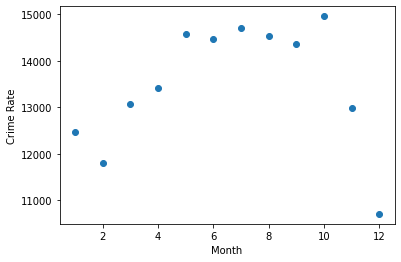

In [43]:
#Visualize Correlation betweeen Aggregate Crime Rate and Month
plt.scatter(crime_month_index.Month, crime_month_index.AggregateCrime)
plt.xlabel('Month') 
plt.ylabel('Crime Rate')
plt.show()

In [44]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr = crime_month_index.corr(method='pearson')
pearsoncorr 

,Month,AggregateCrime
Month,1.000000,0.087221
AggregateCrime,0.087221,1.000000


In [45]:
#Create a DataFrame of the Aggregate Crime Rate by Day of the Week 
Week_rate = pd.DataFrame(temp_binary_encoded_df.occurrencedayofweek.value_counts().reset_index().values, columns=["Day_Of_Week", "AggregateCrime"])
Week_rate_index = Week_rate.sort_index(axis = 0, ascending=True)
Week_rate_index

,Day_Of_Week,AggregateCrime
0,5,24648
1,6,24370
2,7,23533
3,4,22759
4,3,22433
5,1,22364
6,2,21989


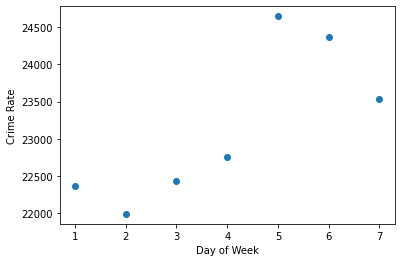

In [46]:
#Visualize Correlation betweeen Aggregate Crime Rate and Day of the Week 
plt.scatter(Week_rate_index.Day_Of_Week, Week_rate_index.AggregateCrime)
plt.xlabel('Day of Week') 
plt.ylabel('Crime Rate')
plt.show()

In [47]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_week = Week_rate_index.corr(method='pearson')
pearsoncorr_week

,Day_Of_Week,AggregateCrime
Day_Of_Week,1.000000,0.776441
AggregateCrime,0.776441,1.000000


In [48]:
#Create a DataFrame of the Aggregate Crime Rate by Hour (24hr) 
hour_rate = pd.DataFrame(temp_binary_encoded_df.hour_num.value_counts().reset_index().values, columns=["Hour", "AggregateCrime"])
hour_crime_rate_index = hour_rate.sort_index(axis = 0, ascending=True)
hour_crime_rate_index.head()


,Hour,AggregateCrime
0,0,10403
1,12,9092
2,21,8788
3,18,8741
4,20,8651


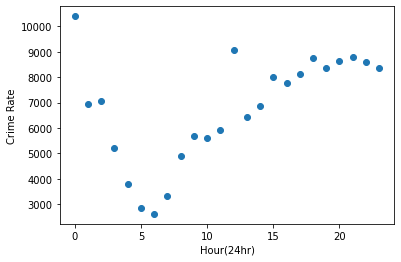

In [49]:
#Visualize Correlation betweeen Aggregate Crime Rate and Hour (24hr) 
plt.scatter(hour_crime_rate_index.Hour, hour_crime_rate_index.AggregateCrime)
plt.xlabel('Hour(24hr)') 
plt.ylabel('Crime Rate')
plt.show()

In [50]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_hour = hour_crime_rate_index.corr(method='pearson')
pearsoncorr_hour

,Hour,AggregateCrime
Hour,1.000000,0.514109
AggregateCrime,0.514109,1.000000


In [51]:
#Create a DataFrame of the Aggregate Crime Rate by Temperature
Temp_rate = pd.DataFrame(temp_binary_encoded_df.mean_temp.value_counts().reset_index().values, columns=["Mean_temp", "AggregateCrime"])
temp_crime_rate_index = Temp_rate.sort_index(axis = 0, ascending=True)
temp_crime_rate_index.head()

,Mean_temp,AggregateCrime
0,22.0,7197.0
1,17.0,6234.0
2,19.0,6151.0
3,20.0,6126.0
4,21.0,5994.0


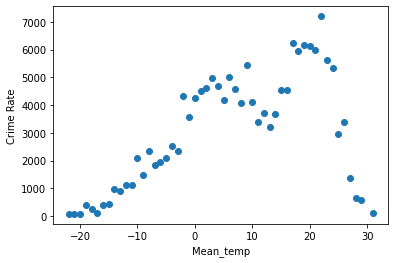

In [52]:
#Visualize Correlation betweeen Aggregate Crime Rate and Temperature 
plt.scatter(temp_crime_rate_index.Mean_temp, temp_crime_rate_index.AggregateCrime)
plt.xlabel('Mean_temp') 
plt.ylabel('Crime Rate')
plt.show()

In [53]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_temp = temp_crime_rate_index.corr(method='pearson')
pearsoncorr_temp

,Mean_temp,AggregateCrime
Mean_temp,1.000000,0.570894
AggregateCrime,0.570894,1.000000


# Step 2: Apply Machine Learning Models

In [54]:
#Analyze the Correlation Between Mean Temperature and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = temp_crime_rate_index.Mean_temp.values.reshape(-1, 1)
y = temp_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(53, 1)

In [55]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [57]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [58]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(11, 1)
(11, 1)


In [59]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,597.0,4957.233357
1,2108.0,2366.059256
2,1127.0,1832.582236
3,2106.0,1985.004242
4,4698.0,3051.958283
5,6151.0,4195.123327
6,2332.0,2518.481262
7,897.0,1756.371233
8,2533.0,2442.270259
9,3374.0,4728.600348


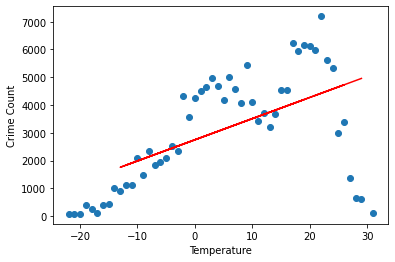

In [60]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Temperature')
plt.show()

In [61]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[76.21100295]]
[2747.11427117]


In [62]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1198.5842043261398
Mean Squared Error: 2859354.8907539477
Root Mean Squared Error: 1690.9627112251612


In [63]:
#Analyze the Correlation Between Month and Aggregate Crime Using a Linear Regression Model 
#Assign X and Y Variables 
X = crime_month_index.Month.values.reshape(-1, 1)
y = crime_month_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(12, 1)

In [64]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [66]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [67]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(3, 1)
(3, 1)


In [68]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13418,13427.283217
1,10710,13685.576923
2,14466,13491.856643


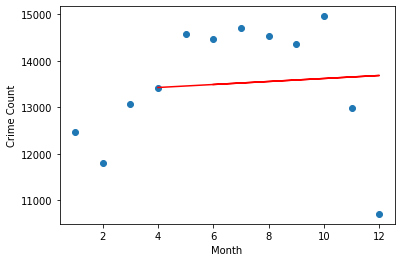

In [69]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Month')
plt.show()

In [70]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[32.28671329]]
[13298.13636364]


In [71]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1319.6678321678326
Mean Squared Error: 3267699.8275180547
Root Mean Squared Error: 1807.6780209755427


In [72]:
#Analyze the Correlation Between Day of the Week and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = Week_rate_index.Day_Of_Week.values.reshape(-1, 1)
y = Week_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(7, 1)

In [73]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [75]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [76]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(2, 1)
(2, 1)


In [77]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21989,22407.714286
1,23533,24279.857143


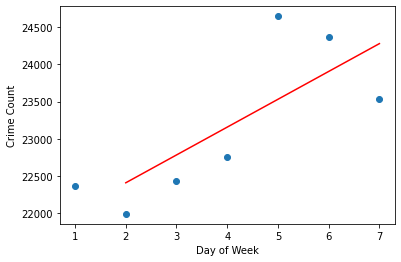

In [78]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Day of Week')
plt.show()

In [79]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[374.42857143]]
[21658.85714286]


In [80]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 582.785714285712
Mean Squared Error: 366558.6224489771
Root Mean Squared Error: 605.4408496698725


In [81]:
#Analyze the Correlation Between Hour of the Day and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = hour_crime_rate_index.Hour.values.reshape(-1, 1)
y = hour_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(24, 1)

In [82]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [84]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [85]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(5, 1)
(5, 1)


In [86]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7047,5274.593913
1,7766,7454.771304
2,2856,5741.774783
3,6424,6987.590435
4,3777,5586.047826


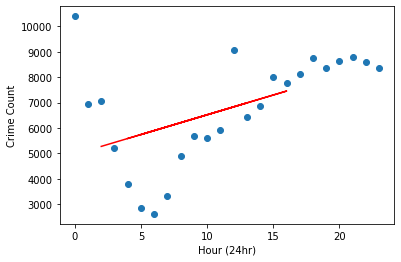

In [87]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Hour (24hr)')
plt.show()

In [88]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[155.72695652]]
[4963.14]


In [89]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1468.4095652173914
Mean Squared Error: 3031254.189853309
Root Mean Squared Error: 1741.0497379033459


# Machine Learning Model: Facebook Prophet Model 

In [90]:
#Import Dependencies 
from fbprophet import Prophet

In [91]:
#Create a date and crime dataframe 
prophet_df = pd.DataFrame(temp_binary_encoded_df.date_.value_counts().reset_index().values, columns=["ds", "y"])
prophet_df_index = prophet_df.sort_index(axis = 0, ascending=True)
prophet_df_index.head()

,ds,y
0,2015-01-01,220
1,2018-01-01,216
2,2017-01-01,189
3,2016-01-01,174
4,2018-06-01,172


In [92]:
#Fit the Prophet model to the dataframe 
m = Prophet()
m.fit(prophet_df_index)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
#Create Future dataframe 
future = m.make_future_dataframe(periods=1800)
future.tail()

,ds
3566,2023-10-15
3567,2023-10-16
3568,2023-10-17
3569,2023-10-18
3570,2023-10-19


In [94]:
#Create forecasted dataframe 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3566,2023-10-15,120.859174,101.782978,139.771474
3567,2023-10-16,116.731596,96.963117,137.564329
3568,2023-10-17,115.782677,96.285901,137.349385
3569,2023-10-18,118.103036,98.257494,138.329861
3570,2023-10-19,120.084885,101.675594,140.800611


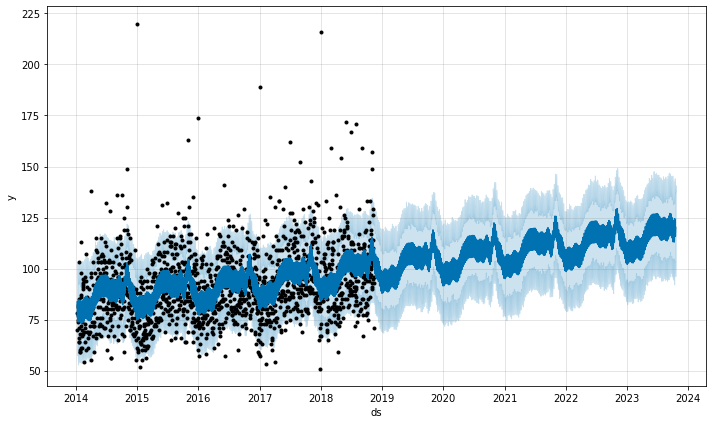

In [95]:
# Plot the forecasted dataframe 
fig1 = m.plot(forecast)

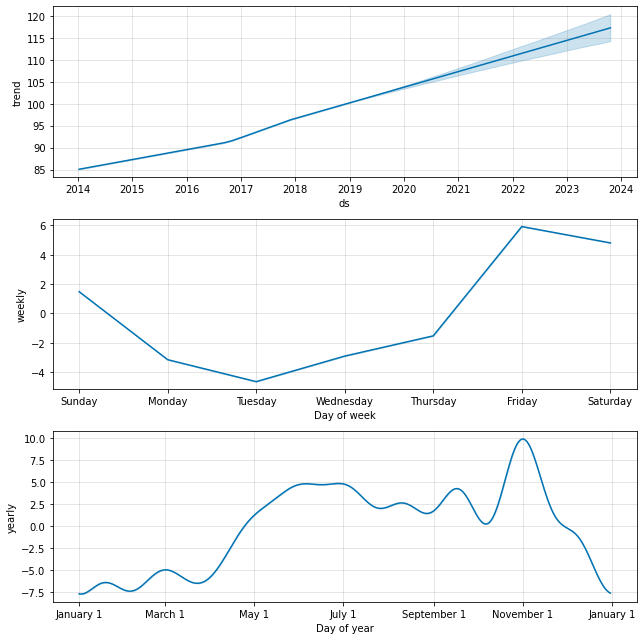

In [96]:
#Plot components of the forecasted datat 
fig2 = m.plot_components(forecast)

In [97]:
#Import plotly to build interactive model 
from fbprophet.plot import plot_plotly, plot_components_plotly

In [98]:
#Make an interactive plot for forecasted data 
plot_plotly(m, forecast)

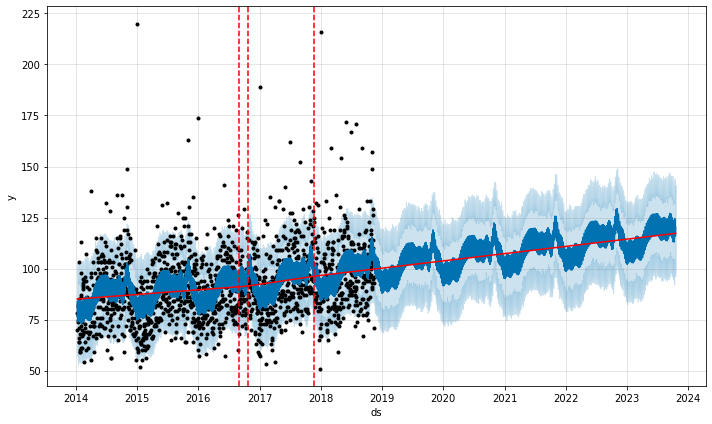

In [99]:
# changing trend points
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [100]:
# Import dependencies for cross validation 
from fbprophet.diagnostics import cross_validation
prophet_df_index.shape

(1771, 2)

In [101]:
#Perform cross validation 
cv = cross_validation(m, initial = "15 days", period = "360 days", horizon = "1600 days")
cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2014-06-28 00:00:00 and 2014-06-28 00:00:00
100%|██████████| 1/1 [00:11<00:00, 11.10s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-06-29,91.606797,76.235010,105.454468,98,2014-06-28
1,2014-06-30,89.892283,74.450363,104.574106,92,2014-06-28
2,2014-07-01,95.394128,80.109045,110.451199,132,2014-06-28
3,2014-07-02,92.655301,77.329686,107.427947,81,2014-06-28
4,2014-07-03,100.617125,85.734594,115.519560,89,2014-06-28


In [102]:
#Import dependency for checking model accuracy 
from fbprophet.diagnostics import performance_metrics

In [103]:
#Check model's accuracy 
df_pm = performance_metrics(cv)
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,160 days,1512.718052,38.893676,34.792382,0.415776,0.389082,0.14375
1,161 days,1526.791445,39.074179,35.051682,0.418694,0.391289,0.13750
2,162 days,1537.520848,39.211234,35.297801,0.421497,0.395527,0.13125
3,163 days,1541.460468,39.261437,35.346441,0.423067,0.400810,0.13125
4,164 days,1568.281366,39.601532,35.689453,0.428283,0.404078,0.12500
...,...,...,...,...,...,...,...
1436,1596 days,118043.859191,343.575114,342.822852,3.499461,3.479786,0.00000
1437,1597 days,118208.319863,343.814368,343.066811,3.497670,3.479786,0.00000
1438,1598 days,118393.458059,344.083504,343.329931,3.497624,3.479786,0.00000
1439,1599 days,118873.019279,344.779668,344.019513,3.517852,3.481120,0.00000


In [104]:
import pickle

In [106]:
file_name='model.pkl'
f=open(file_name,'wb')
pickle.dump(m,f)
f.close()

In [109]:
cv.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
y                      int64
cutoff        datetime64[ns]
dtype: object